# **Tugas Besar Pembelajaran Mesin (Classification)**

Kelas : IF-43-12

Anggota : 
- Raihan Romzi Rakhman (1301194376)
- Haydar Rizaldy Putera Prayudi (1301194388)

<br><br>

## **Import Library**

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

<br>

## **Import Dataset**

In [57]:
# Menggabungkan data taining dan data test menjadi satu dataframe
df_train = pd.read_csv("https://raw.githubusercontent.com/raihanromzi/Python.Classification_ML/main/Datasets/kendaraan_train.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/raihanromzi/Python.Classification_ML/main/Datasets/kendaraan_test.csv")
df = df_train.append(df_test)

# Mengetahui total jumlah data
print("Total Dataset :", len(df))
df.head(5)

Total Dataset : 333470


,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1.0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2.0,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3.0,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4.0,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5.0,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


<br>

## **Eksplorasi dan Persiapan Data**

Sebelum melakukan Classification, data harus dilakukan prapemrosesan terlebih dahulu. Tujuannya agar ketika sudah masuk ke proses selanjutnya maka data sudah bersih dan siap untuk diimplementasikan algoritma tanpa mengurangi efisiensi hasil.

<br>

### **Delete Unused Data**

Kolom "id" dihapus karena dapat dipastikan tidak memiliki keterikatan pada hasil akhir.

In [58]:
# Menghapus Kolom "id"
df = df.drop(axis=1, columns=["id"])

# Mengetahui total jumlah data
print("Total Dataset :", len(df))
df.sample(5)

Total Dataset : 333470


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
120958,Wanita,NaN,1.0,6.0,0.0,< 1 Tahun,Pernah,35002.0,152.0,199.0,0
36012,Pria,53.0,1.0,28.0,0.0,1-2 Tahun,Pernah,24163.0,26.0,96.0,0
146134,Wanita,35.0,1.0,28.0,0.0,1-2 Tahun,Pernah,27859.0,122.0,NaN,1
199176,Wanita,41.0,1.0,28.0,1.0,1-2 Tahun,Tidak,34353.0,124.0,219.0,0
92326,Pria,22.0,1.0,11.0,1.0,< 1 Tahun,Tidak,29961.0,152.0,62.0,0


<br>

<br>

### **Check Data Info**

Mengeksplorasi informasi tentang dataset, agar memberikan gambaran yang jelas terkait pesebaran data.

<br>

#### **Check Data Type**

In [59]:
# Mengetahui data type tiap kolom
df.dtypes

Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
dtype: object

<br>

#### **Statistical Summary**

Melihat summary setiap atribut dengan fungsi describe. Fungsi ini menampilkan summary statistik untuk atribut numerik dari dataset kita, termasuk di dalamnya count, mean, nilai minimum dan maksimum, serta nilai-nilai persentilnya.

In [60]:
# Mengetahui Count, Mean, Min, Persentase
df.describe()

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,319256.000000,319066.000000,319164.000000,319241.000000,318901.000000,319171.000000,319478.000000,333470.000000
mean,38.840028,0.997859,26.394380,0.458603,30550.097899,112.045299,154.310350,0.122551
std,15.526398,0.046217,13.246852,0.498284,17192.548724,54.196470,83.686932,0.327921
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24397.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31660.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39392.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


<br>

#### **Check Missing Value**

In [61]:
# Mengecek apakah ada missing value pada DataFrame , terdapat 142.916 data yang missing, sehingga tidak bisa jika langsung di drop.r
df.isnull().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

<br>

#### **Check Duplicate Data**

In [62]:
duplicate = list(df.duplicated())
print("Data Duplikasi :", duplicate.count(True))

Data Duplikasi : 204


<br>

#### **Delete Duplicate Data**

Duplikat adalah kasus ekstrim pengambilan sampel nonrandom, dan membuat bias model.

Faktor yang menentukan
* Memastikan itu bukan data nyata yang kebetulan memiliki nilai yang identik
- Mencoba mencari tahu mengapa Anda memiliki duplikat dalam data Anda. Misalnya, terkadang orang dengan sengaja 'mengambil sampel berlebihan' kategori langka dalam data pelatihan

In [63]:
df.drop_duplicates(inplace=True)

In [64]:
duplicate = list(df.duplicated())
print("Data Duplikasi :", duplicate.count(True))

Data Duplikasi : 0


<br>

#### **Label Encoding**

Dilakukan untuk mengubah fitur data kategorikal seperti **Jenis_Kelamin, Umur_Kendaraan, dan Kendaraan_Rusak** menjadi data numerik.

<br>

Source : 
*   https://ichi.pro/id/label-encoder-vs-one-hot-encoder-dalam-machine-learning-70104389146145
*  https://ngodingdata.com/python-pandas-memahami-categorical-data/

In [65]:
# Import library
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Pria = 0, Wanita = 1
df["Jenis_Kelamin"] = encoder.fit_transform(df["Jenis_Kelamin"])

# 1-2 Tahun = 0, < 1 = 1, >2 = 2
df["Umur_Kendaraan"] = encoder.fit_transform(df["Umur_Kendaraan"])

# Pernah = 0, Tidak = 1
df["Kendaraan_Rusak"] = encoder.fit_transform(df["Kendaraan_Rusak"])

df.head(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,30.0,1.0,33.0,1.0,1,1,28029.0,152.0,97.0,0
1,0,48.0,1.0,39.0,0.0,2,0,25800.0,29.0,158.0,0
2,2,21.0,1.0,46.0,1.0,1,1,32733.0,160.0,119.0,0
3,1,58.0,1.0,48.0,0.0,0,1,2630.0,124.0,63.0,0
4,0,50.0,1.0,35.0,0.0,2,2,34857.0,88.0,194.0,0


<br>

#### **Handling Missing Value**

Missing Value adalah hilangnya beberapa data yang telah diperoleh. Ada beberapa metode dalam mengatasi hal tersebut. Dalam kasus ini kami menggunakan Imputation method yaitu mengganti Missing Value dengan nilai Mean(Rata-rata) untuk data numerik, dan Mode(Modus) untuk data kategorikal.

<br>

Source : https://towardsdatascience.com/handling-missing-data-like-a-pro-part-2-imputation-methods-eabbf10b9ce4

In [66]:
# Mean (Numerik)
df['Umur'].fillna(math.floor(df['Umur'].mean()), inplace=True)
df['Premi'].fillna(math.floor(df['Premi'].mean()), inplace=True)
df['Kanal_Penjualan'].fillna(math.floor(df['Kanal_Penjualan'].mean()), inplace=True)
df['Lama_Berlangganan'].fillna(math.floor(df['Lama_Berlangganan'].mean()), inplace=True)

# Mode (Kategorik)
df['SIM'].fillna(math.floor(df['Lama_Berlangganan'].mode()), inplace=True)
df['Kode_Daerah'].fillna(math.floor(df['Kode_Daerah'].mode()), inplace=True)
df['Sudah_Asuransi'].fillna(math.floor(df['Sudah_Asuransi'].mode()), inplace=True)

In [67]:
# Missing value pada data sudah bersih
df.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

<br>

#### **Handling Data Outlier**

Data Outlier adalah nilai yang tidak biasa dalam kumpulan data, dan dapat mendistorsi analisis statistik. Mengingat masalah yang dapat ditimbulkannya, mungkin yang terbaik adalah menghapusnya dari data Anda. Tapi, itu tidak selalu terjadi. Menghapus outlier hanya sah untuk alasan tertentu.

<br>

Setelah melakukan berbagai percobaan dan analisis, kami beranggapan bahwa Data Outlier pada kolom "Premi" jika dihapus, akan menghilangkan 64.341 data. Jumlah tersebut sekitar 20% dari data.

<br>

Premi sendiri adalah sejumlah uang yang ditetapkan oleh Perusahaan Asuransi dan disetujui oleh Pemegang Polis untuk dibayarkan berdasarkan perjanjian Asuransi Dan sangat masuk akal jika terdapat Data Outlier, sebab setiap orang mungkin berbeda jumlah Premi nya. Jika kita menghapus, maka kita mungkin akan kehilangan informasi penting. Misalnya, sangat masuk akal jika nilai Premi nya tinggi, maka orang tersebut memiliki jumlah uang yang banyak, dan tertarik untuk membeli.

Text(0.5, 1.0, 'Lama Berlangganan')

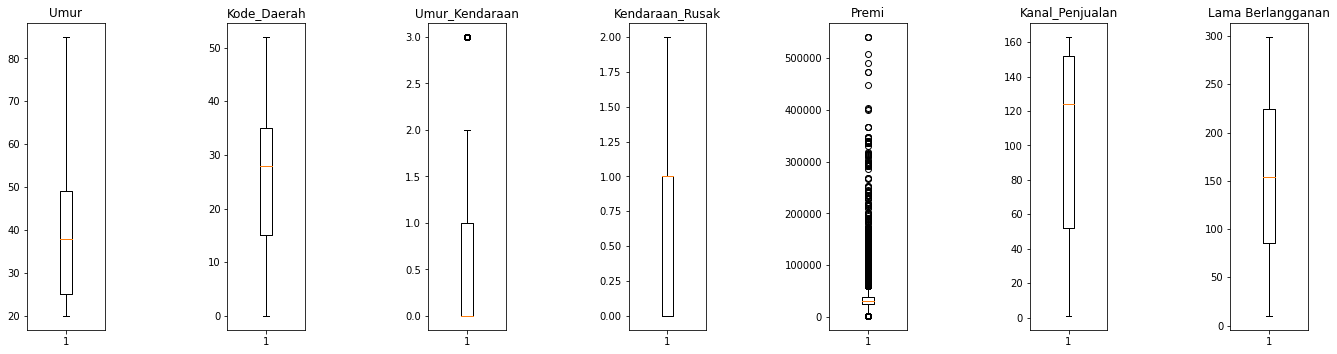

In [68]:
# Membuat boxplot agar mengetahui apakah ada data outlier
fig, (Umur, Kode_Daerah, Umur_Kendaraan, Kendaraan_Rusak, Premi, Kanal_Penjualan, Lama_Berlangganan) = plt.subplots(1,7)
fig.tight_layout()
fig.set_size_inches(20,5)

# Umur
Umur.boxplot(df["Umur"])
Umur.set_title("Umur")

# Kode_Daerah
Kode_Daerah.boxplot(df["Kode_Daerah"])
Kode_Daerah.set_title("Kode_Daerah")

# Umur_Kendaraan
Umur_Kendaraan.boxplot(df["Umur_Kendaraan"])
Umur_Kendaraan.set_title("Umur_Kendaraan")

# Kendaraan_Rusak
Kendaraan_Rusak.boxplot(df["Kendaraan_Rusak"])
Kendaraan_Rusak.set_title("Kendaraan_Rusak")

# Premi
Premi.boxplot(df["Premi"])
Premi.set_title("Premi")

# Kanal_Penjualan
Kanal_Penjualan.boxplot(df["Kanal_Penjualan"])
Kanal_Penjualan.set_title("Kanal_Penjualan")

# Lama_Berlangganan
Lama_Berlangganan.boxplot(df["Lama_Berlangganan"])
Lama_Berlangganan.set_title("Lama Berlangganan")

<br>

#### **Normalisasi Data**

Tujuan Normalisasi Database adalah untuk menghilangkan dan mengurangi redudansi data dan tujuan yang kedua adalah memastikan dependensi data. Menggunakan library SKlearn yang bernama StandarScaler untuk mempermudah normalisasi.



In [69]:
from sklearn.preprocessing import MinMaxScaler

df_tertarik = df["Tertarik"]
df_drop_tertarik = df.drop(axis=1, columns=["Tertarik"])

In [70]:
column = [
          'Jenis_Kelamin', 'Umur', 'SIM', 'Kode_Daerah', 'Sudah_Asuransi',
          'Umur_Kendaraan', 'Kendaraan_Rusak', 'Premi', 'Kanal_Penjualan',
          'Lama_Berlangganan'
]

# Mengubah skala data menjadi antara 0 dan 1
preprocessor = MinMaxScaler(feature_range=(0,1))

# Proses fit dan transfrom terhadap dataframe
df_scaled = preprocessor.fit_transform(df_drop_tertarik)

# Mengubah df_scaled (array) menjadi dataframe
df = pd.DataFrame(data=df_scaled, columns=column)

In [78]:
# Reset index untuk menghindari error saat concat
df.reset_index(drop=True, inplace=True)
df_tertarik.reset_index(drop=True, inplace=True)

In [80]:
# Tambahkan kolom "Tertarik"
df = pd.concat([df, df_tertarik], axis=1)

In [82]:
df.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
163850,0.5,0.353846,0.006494,0.538462,0.0,0.0,1.0,0.077381,0.759259,0.709343,1
136662,0.0,0.276923,0.006494,0.538462,0.0,0.0,1.0,0.079589,0.759259,0.131488,0
256652,0.0,0.738462,0.006494,0.153846,0.0,0.0,0.0,0.075537,0.154321,0.920415,0
129292,0.0,0.553846,0.006494,0.153846,1.0,0.0,0.5,0.000000,0.154321,0.508651,0
140797,0.0,0.353846,0.006494,0.538462,1.0,0.0,0.5,0.084166,0.759259,0.121107,0


<br>

#### **PCA**

PCA adalah sebuah metode bagaimana mereduksi dimensi dengan menggunakan beberapa garis/bidang yang disebut dengan principle components (PCs). Dengan menggunakan PCA kita bisa mereduksi dimensi feature data menjadi lebih sedikit, sehingga memudahkan dalam mencari hubungan antar feature data tanpa menghilangkan informasi-informasi pada feature yang lain.
<br>

Alasan lainnya saya menggunakan PCA karena, sebelumnya saya sudah melakukan feature selection, namun solusi yang dihasilkan tidak bisa diterima. Saya mendapatkan **Sudah_Asuransi, Kendaraan_Rusak, Jenis_Kelamin,** dan **Umur** yang dijadikan feature untuk memprediksi **Tertarik**. Yang mana, data tersebut adalah data yang memiliki value 1 dan 0. Sehingga, menurut kami PCA adalah solusi yang bisa diambil. Namun, kekurangannya kita tidak tahu Component 1, dan **Component 2** merepresentasikan apa.

<br>
Source : 

*   https://towardsdatascience.com/how-where-and-when-we-should-use-pca-ab3dddad5888
*   https://youtu.be/2NEu9dbM4A8
*   https://youtu.be/oiusrJ0btwA



In [83]:
# Import PCA Library
from sklearn import decomposition

In [84]:
# Memisahkan kolom 'Tertarik' karena PCA merupakan unsupervised, sehingga tidak memerlukan "Tertarik"
df_tertarik_pca = df["Tertarik"]
df_drop_tertarik = df.drop(axis=1, columns=["Tertarik"])

In [85]:
# Mereduksi menjadi 2 component
pca = decomposition.PCA(n_components=2)

# Menghitung scores value
scores = pca.fit_transform(df_drop_tertarik)

In [86]:
df_pca = pd.DataFrame(data=scores, columns=["Component 1","Component 2"])
df_pca.head(5)

,Component 1,Component 2
0,0.676821,-0.137714
1,-0.604073,0.189375
2,0.737812,-0.313491
3,-0.339299,0.011243
4,-0.126711,0.026233


In [87]:
# Tambahkan kolom "Tertarik"
df = pd.concat([df_pca, df_tertarik_pca], axis=1)

In [88]:
df.sample(5)

,Component 1,Component 2,Tertarik
47400,0.651217,-0.059351,0
261453,-0.453036,-0.265688,1
62361,-0.581434,0.086041,1
204572,0.400437,0.731176,0
60069,-0.361659,-0.541214,0


<br>

### **Export Data Hasil Eksplorasi dan Persiapan**

In [89]:
# Menyimpan hasil eksplorasi data
df.to_csv("kendaraan_clean_pca.csv", index=False, header=True)